Transformation of ellipse
-------------------------
These are some calculations to invesitage how an ellipse with axes $a$ and $b$, rotated over an angle
$theta$, is transformed by 

$$\left(\begin{array}{c} x \\ y \\ \end{array}\right) = 
 \left(\begin{array}{cc} A & B \\ B & C \\ \end{array}\right) 
 \left(\begin{array}{c} X \\ Y \\ \end{array}\right)
$$

In [1]:
from sympy import *
init_printing()

In [2]:
x,y,a,b,theta,x_2,y_2 = symbols("x y a b theta x_2 y_2")

This is the equation of an ellipse with axes aligned with the coordinate axes

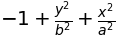

In [3]:
eqn = (x/a)**2 + (y/b)**2 - 1
eqn

To get the equation of this ellipse that's rotated over an angle $\theta$ we'll set

$$\left(\begin{array}{c} x \\ y \\ \end{array}\right) = 
 \left(\begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \\ \end{array}\right) 
 \left(\begin{array}{c} x_2 \\ y_2 \\ \end{array}\right)
$$

We'll then just substitute $x_2$ and $y_2$ by $x$ and $y$ again. 

The resulting equation is the one for an ellipse centered on $(0,0)$, rotated over 
an angle $\theta$:

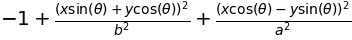

In [4]:
eqn = eqn.subs(x, x_2*cos(theta) - y_2*sin(theta)).subs(y, x_2*sin(theta) + y_2*cos(theta)).subs(x_2,x).subs(y_2,y)
eqn

In general an ellipse centered on $(0,0)$ can also be written as

$$ q_x x^2 + q_{xy} x y + q_y y^2 = 0 $$

So to get e.g. $q_x$, we'd need to differentiate the left side twice with respect to $x$ and divide by two. So for the previous equation, we'd find:

In [5]:
print("q_x =", simplify(diff(diff(eqn,x),x)/2))
print("q_y =", simplify(diff(diff(eqn,y),y)/2))
print("q_xy =",simplify(diff(diff(eqn,x),y)))

q_x = sin(theta)**2/b**2 + cos(theta)**2/a**2
q_y = cos(theta)**2/b**2 + sin(theta)**2/a**2
q_xy = sin(2*theta)/b**2 - sin(2*theta)/a**2


By combining these equations we can find out what $a$, $b$ and $theta$ are, based on the coefficients
$q_x$, $q_xy$ and $q_x$, we'll do this below.

First, we'll see what happens if we apply the linear transformation

$$\left(\begin{array}{c} x \\ y \\ \end{array}\right) = 
 \left(\begin{array}{cc} A & B \\ B & C \\ \end{array}\right) 
 \left(\begin{array}{c} x_2 \\ y_2 \\ \end{array}\right)
$$

The idea is to see what happens to an ellipse-shaped source based on the gravitational lensing shear,
for which $A = 1-\kappa-\gamma_1$, $B=-\gamma_2$ and $C=1-\kappa+\gamma_1$.

Here too, we'll then just substitute $x_2$ and $y_2$ by $x$ and $y$. 

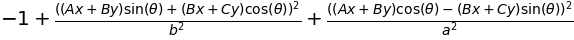

In [6]:
A, B, C = symbols("A B C")
eqn = eqn.subs(x, x_2*A + y_2*B).subs(y, x_2*B+y_2*C).subs(x_2,x).subs(y_2,y)
eqn

Like before, if this is of the form

$$ C_x x^2 + C_{xy} x y + C_y y^2 $$

and we can get these coefficients by differentiating:

In [7]:
symbols("C_x C_y C_xy")
C_x = simplify(diff(diff(eqn,x),x)/2)
C_y = simplify(diff(diff(eqn,y),y)/2)
C_xy = simplify(diff(diff(eqn,x),y))
print("C_x =", C_x)
print("C_y =", C_y)
print("C_xy =", C_xy)

C_x = (A*sin(theta) + B*cos(theta))**2/b**2 + (A*cos(theta) - B*sin(theta))**2/a**2
C_y = (B*sin(theta) + C*cos(theta))**2/b**2 + (B*cos(theta) - C*sin(theta))**2/a**2
C_xy = 2*(a**2*(A*sin(theta) + B*cos(theta))*(B*sin(theta) + C*cos(theta)) + b**2*(A*cos(theta) - B*sin(theta))*(B*cos(theta) - C*sin(theta)))/(a**2*b**2)


This again represents a rotated ellipse, but we don't yet know what it's axes are, or what 
the rotation angle is. To investigate, suppose our new ellipse has axes $a_{new}$ and $b_{new}$,
where $a_{new} > b_{new}$, and is rotated over an angle $\theta_{new}$.

Below, we'll introduce $ab_{diff}$, which is $a_{new} - b_{new}$, and should be positive. This is
a workaround to let sympy know that $a_{new} > $b_{new}$, see https://stackoverflow.com/a/49185019

In [8]:
a_new,b_new = symbols("a_new b_new", positive=True)

theta_new = symbols("theta_new")
ab_diff = symbols("ab_diff", positive=True)
a_new = b_new+ab_diff

From cell \[5\] we know what the coefficients are based on $a_{new}$, $b_{new} and $\theta_{new}$:

In [9]:
q_x,q_xy,q_y = symbols("q_x q_xy q_y")
q_x = sin(theta_new)**2/b_new**2 + cos(theta_new)**2/a_new**2
q_y = cos(theta_new)**2/b_new**2 + sin(theta_new)**2/a_new**2
q_xy =  sin(2*theta_new)/b_new**2 - sin(2*theta_new)/a_new**2

By playing around with some combinations of $q_x$, $q_y$ and $q_{xy}$, we can get
some parameters.

In [10]:
simplify(2/((q_x+q_y)-sqrt(q_xy**2+(q_x-q_y)**2)))

This is $(ab_{diff} + b_{new})^2$, which is $((a_{new} - b_{new} + b_{new})^2$, or just $a_{new}^2$

Similarly:

In [11]:
simplify(2/((q_x+q_y)+sqrt(q_xy**2+(q_x-q_y)**2)))

In [12]:
# So our new parameters are:
#a_new = sqrt(2/((q_x+q_y)-sqrt(q_xy**2+(q_x-q_y)**2)))
#b_new = sqrt(2/((q_x+q_y)+sqrt(q_xy**2+(q_x-q_y)**2)))

To get the angle, we'll calculate the sine and cosine:

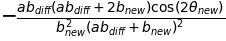

In [13]:
simplify(q_x-q_y)

The pre-factor is just

$$ -\frac{a_{new}^2 - b_{new}^2}{b_{new}^2 a_{new}^2} $$

as you can see from:

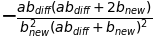

In [14]:
-simplify(a_new**2-b_new**2)/(b_new**2*a_new**2)

In [15]:
#So cos(2*theta_new) = -(q_x-q_y)*(a_new**2*b_new**2)/(a_new**2-b_new**2)

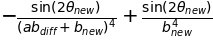

In [16]:
simplify(q_xy*(q_x+q_y))

In [17]:
# So sin(2*theta_new) = q_xy*(q_x+q_y)/(1/b_new**4-1/a_new**4) 

Once we know $\sin2\theta_{new}$ and $\cos2\theta_{new}$ we can get $2\theta_{new}$ using $\mathrm{arctan2}$ (https://en.wikipedia.org/wiki/Atan2)